In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

from pmdarima import auto_arima
import pmdarima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
 
from itertools import product
#from tqdm import tqdm_notebook

import Model_Evaluation as me

In [2]:
#books = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/Sales_Data/Books_ext_fs.csv')
#books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext.csv')
#books = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Books_ext_fs.csv')
#packaging = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Packaging_ext_fs.csv')
packaging = pd.read_csv('pack_ext_fs_47.csv')
packaging['Year_Month'] = pd.to_datetime(packaging['Year_Month'])
packaging.set_index('Year_Month', inplace = True)
packaging.index = pd.DatetimeIndex(packaging.index.values,
                               freq=packaging.index.inferred_freq)
packaging

,Sum of Sales,BUILD FOR_Total_Trailer,"Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer",G325_indicators_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking",Change in Payroll Employment (000's)_driver_indicators_m_trucking,"Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer",...,Change in Truck Emp. (000's)_driver_indicators_m_trucking,BUILD FOR_All_Other,PORTEU_indicators_m_trucking,BUILD FOR_All_Other.1,Change in Truck Emp. (000's)_driver_indicators_m_trucking.1,"Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_Y/Y % Change_indicators_m_trucking_trailer","Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer.1",Canada Origin Intermodal Volumes_Domestic_x
2008-01-01,381696.51,10291.0,18764.0,116.8145,88.294650,11.0,14.674525,-3.727683,-5.114613,17.711599,...,-2.0,969.0,1.589857e+06,969.0,-2.0,-27.608874,-34.572797,2261.0,-27.608874,46969.0
2008-02-01,430305.85,11750.0,18603.0,115.6614,87.998407,-79.0,-18.664736,-4.198226,-4.132064,-21.096509,...,-4.0,1104.0,1.582820e+06,1104.0,-4.0,-8.198726,-40.691569,2824.0,-8.198726,44924.0
2008-03-01,451627.81,12333.0,16986.0,114.5234,87.790155,-49.0,18.702970,-5.142497,-6.990265,12.451390,...,2.0,1158.0,1.521727e+06,1158.0,2.0,-32.989621,-42.219161,1764.0,-32.989621,46727.0
2008-04-01,467417.48,11583.0,17294.0,113.1064,89.639867,-240.0,-19.327365,-0.275367,-2.546753,-9.859063,...,-2.0,931.0,1.606410e+06,931.0,-2.0,-35.458469,-42.061705,1858.0,-35.458469,53497.0
2008-05-01,462676.37,12336.0,17632.0,112.0097,89.134818,-177.0,5.938456,3.671014,-5.080068,3.365907,...,-6.0,991.0,1.656703e+06,991.0,-6.0,-23.315019,-41.314554,2595.0,-23.315019,53653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,456579.51,15083.0,10265.0,95.6420,89.962431,1761.0,-13.073806,-16.432942,-13.644998,-25.612015,...,3.0,1359.0,2.034822e+06,1359.0,3.0,-82.635645,-56.006716,1055.0,-82.635645,57503.0
2020-08-01,318564.72,16134.0,8975.0,96.8567,90.641835,1493.0,-2.832193,-9.182134,-10.970670,-20.398412,...,10.0,1671.0,2.234365e+06,1671.0,10.0,-65.888001,-49.958769,1111.0,-65.888001,56478.0
2020-09-01,980476.36,18288.0,9413.0,96.4458,90.587889,711.0,21.757348,3.572362,-6.599121,46.491376,...,4.0,1711.0,2.097868e+06,1711.0,4.0,-19.678565,-41.280187,2316.0,-19.678565,59269.0
2020-10-01,922901.36,19991.0,10338.0,97.7867,94.367218,610.0,1.950027,1.306495,-3.721000,6.538928,...,8.0,2018.0,2.242668e+06,2018.0,8.0,-8.533274,-45.676211,2508.0,-8.533274,60708.0


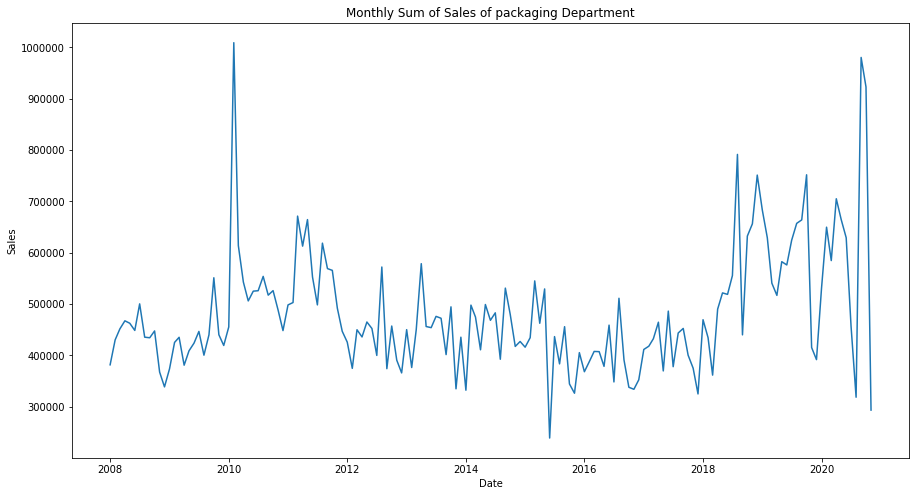

In [3]:
plt.figure(figsize=[15,8])
plt.plot(packaging['Sum of Sales'])
plt.title('Monthly Sum of Sales of packaging Department')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

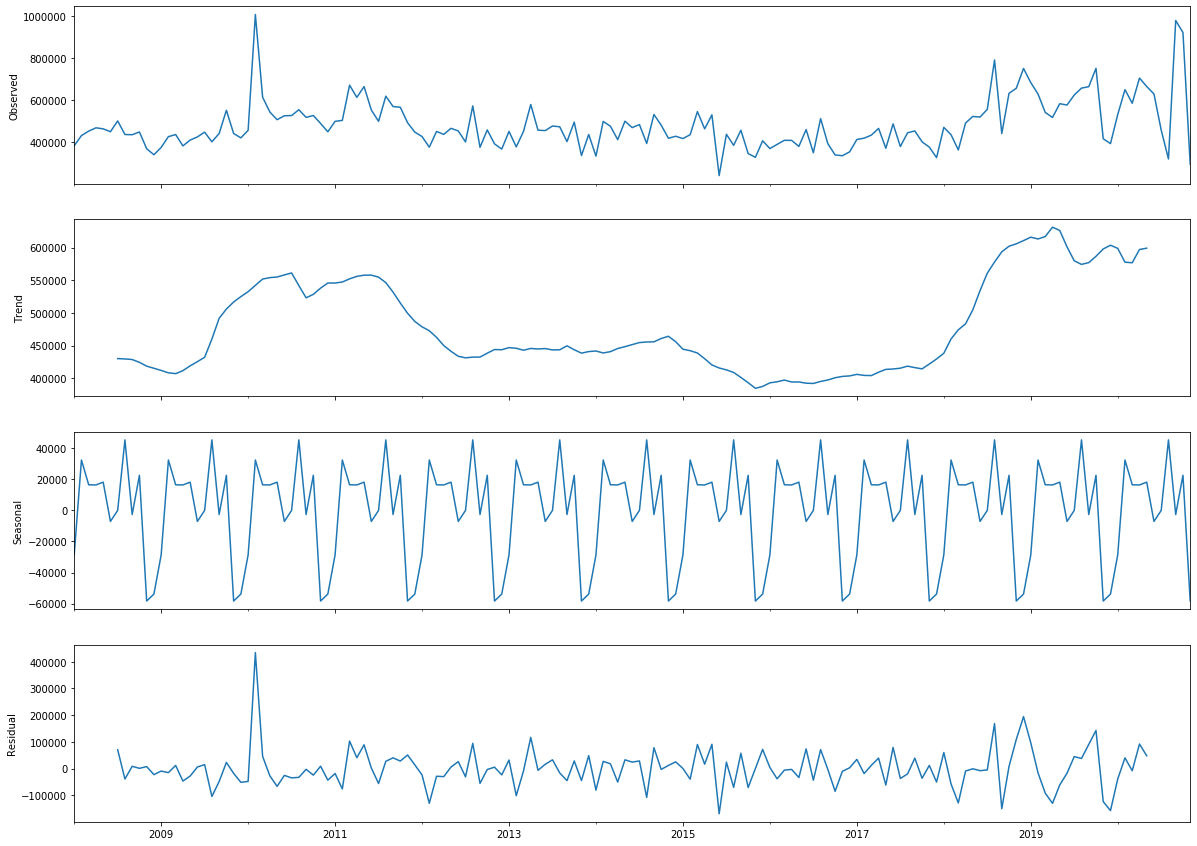

In [4]:
from pylab import rcParams

rcParams['figure.figsize'] = 20,15
decomposition = sm.tsa.seasonal_decompose(packaging['Sum of Sales'], model='additive')
fig, axes = plt.subplots(4, 1, sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.show()

In [5]:
packaging = packaging.dropna(axis = 1)
sales = packaging['Sum of Sales']
exog = packaging.iloc[:,2:]
exog

,"Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer",G325_indicators_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking",Change in Payroll Employment (000's)_driver_indicators_m_trucking,"Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer",Change in Distillate Fuel Inventories_x,"OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking",...,Change in Truck Emp. (000's)_driver_indicators_m_trucking,BUILD FOR_All_Other,PORTEU_indicators_m_trucking,BUILD FOR_All_Other.1,Change in Truck Emp. (000's)_driver_indicators_m_trucking.1,"Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_Y/Y % Change_indicators_m_trucking_trailer","Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer.1",Canada Origin Intermodal Volumes_Domestic_x
2008-01-01,18764.0,116.8145,88.294650,11.0,14.674525,-3.727683,-5.114613,17.711599,-2981.0,16185.0,...,-2.0,969.0,1.589857e+06,969.0,-2.0,-27.608874,-34.572797,2261.0,-27.608874,46969.0
2008-02-01,18603.0,115.6614,87.998407,-79.0,-18.664736,-4.198226,-4.132064,-21.096509,-13327.0,11091.0,...,-4.0,1104.0,1.582820e+06,1104.0,-4.0,-8.198726,-40.691569,2824.0,-8.198726,44924.0
2008-03-01,16986.0,114.5234,87.790155,-49.0,18.702970,-5.142497,-6.990265,12.451390,-9852.0,14647.0,...,2.0,1158.0,1.521727e+06,1158.0,2.0,-32.989621,-42.219161,1764.0,-32.989621,46727.0
2008-04-01,17294.0,113.1064,89.639867,-240.0,-19.327365,-0.275367,-2.546753,-9.859063,-733.0,14264.0,...,-2.0,931.0,1.606410e+06,931.0,-2.0,-35.458469,-42.061705,1858.0,-35.458469,53497.0
2008-05-01,17632.0,112.0097,89.134818,-177.0,5.938456,3.671014,-5.080068,3.365907,6890.0,12060.0,...,-6.0,991.0,1.656703e+06,991.0,-6.0,-23.315019,-41.314554,2595.0,-23.315019,53653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,10265.0,95.6420,89.962431,1761.0,-13.073806,-16.432942,-13.644998,-25.612015,2134.0,19213.0,...,3.0,1359.0,2.034822e+06,1359.0,3.0,-82.635645,-56.006716,1055.0,-82.635645,57503.0
2020-08-01,8975.0,96.8567,90.641835,1493.0,-2.832193,-9.182134,-10.970670,-20.398412,1353.0,18302.0,...,10.0,1671.0,2.234365e+06,1671.0,10.0,-65.888001,-49.958769,1111.0,-65.888001,56478.0
2020-09-01,9413.0,96.4458,90.587889,711.0,21.757348,3.572362,-6.599121,46.491376,-7196.0,28766.0,...,4.0,1711.0,2.097868e+06,1711.0,4.0,-19.678565,-41.280187,2316.0,-19.678565,59269.0
2020-10-01,10338.0,97.7867,94.367218,610.0,1.950027,1.306495,-3.721000,6.538928,-10130.4,36912.0,...,8.0,2018.0,2.242668e+06,2018.0,8.0,-8.533274,-45.676211,2508.0,-8.533274,60708.0


In [6]:
ytrain,ytest,Xtrain,Xtest = train_test_split(sales,exog, test_size=0.15, random_state=60616, shuffle=False)
Xtest.shape

(24, 41)

## ARIMA without exogenous dataset

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
df = pd.DataFrame()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ytrain,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
        except:
            continue
            


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3766.4398959515784
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3347.934489522581
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3101.03846072483
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2796.8075412770086
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3127.379814757024
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3120.1467391297406
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2812.2185239559994
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2793.178431686604
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3658.5398420956894
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3303.522197417249
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3071.060761384666
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2733.5602541069056
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3340.273221698168
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3286.031181228252
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2807.283692257115
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2735.5595099182806
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3352.3295960002697
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3055.181678681127
ARI

In [8]:
df.columns=['param','param_seasonal','AIC']
df.sort_values('AIC').reset_index(drop=True)

,param,param_seasonal,AIC
0,"(0, 1, 1)","(0, 1, 1, 12)",2682.811668
1,"(1, 1, 1)","(0, 1, 1, 12)",2683.177582
2,"(0, 1, 1)","(1, 1, 1, 12)",2684.777846
3,"(1, 1, 1)","(1, 1, 1, 12)",2685.156219
4,"(1, 0, 1)","(0, 1, 1, 12)",2702.026665
...,...,...,...
59,"(0, 0, 0)","(0, 0, 1, 12)",3347.934490
60,"(0, 1, 0)","(0, 0, 0, 12)",3352.329596
61,"(1, 0, 0)","(0, 0, 0, 12)",3378.434695
62,"(0, 0, 1)","(0, 0, 0, 12)",3658.539842


In [9]:
mod = sm.tsa.statespace.SARIMAX(ytrain,
                                            order=(0,1,1),
                                            seasonal_order=(0,1,1,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()

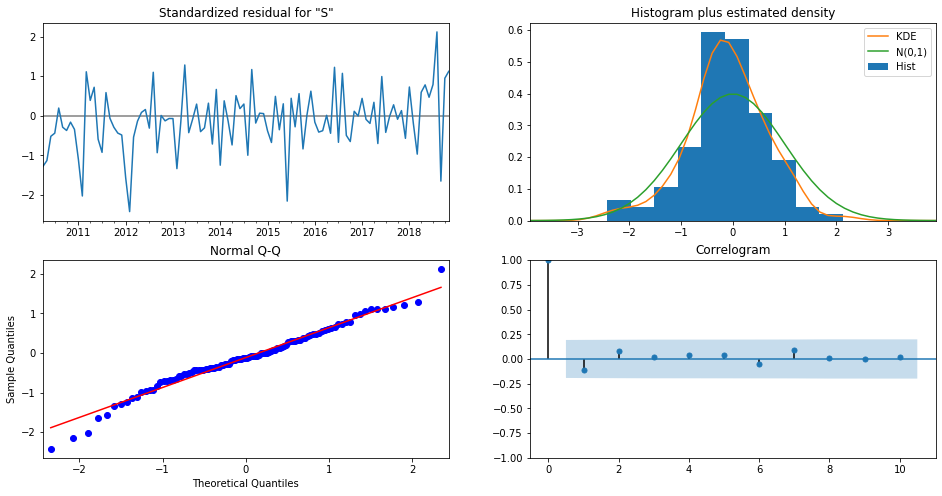

In [10]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

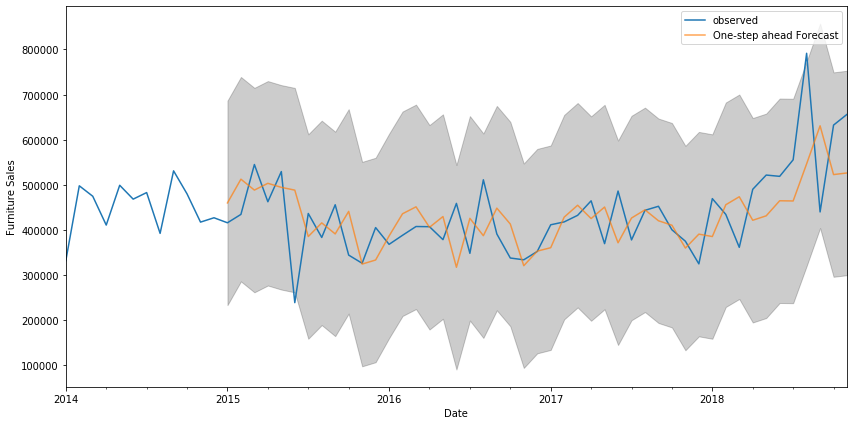

In [11]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ytrain['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

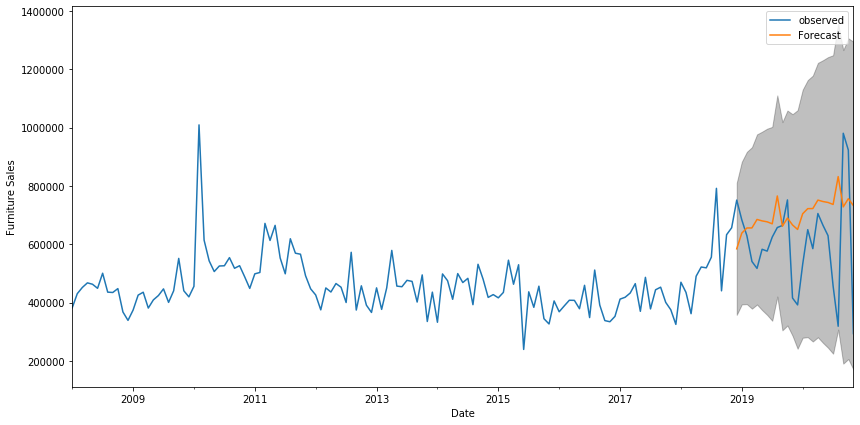

In [12]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = sales.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [15]:
# For training data
me.evaluate_model(pred.predicted_mean, ytrain['2015':])

			Model Performance

Mean Absolute Percentage Error: 0.15829728350660868

Mean Absolute Error: 67298.24273483329

BIAS: 4437.183544874322

Mean Squared Error: 925364097.1124626

Root Mean Squared Error: 30419.79778224146


In [16]:
# For testing data
me.evaluate_model(pred_uc.predicted_mean,ytest)

			Model Performance

Mean Absolute Percentage Error: 0.33319567007220086

Mean Absolute Error: 155129.28529991617

BIAS: -97098.69392257709

Mean Squared Error: 226275752675.28745

Root Mean Squared Error: 475684.5096019918


## SARIMAX with exogenous dataset

In [17]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(ytrain)

(0.47944740472287617, True)

In [18]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(ytrain.diff()[1:,])

(0.01, False)

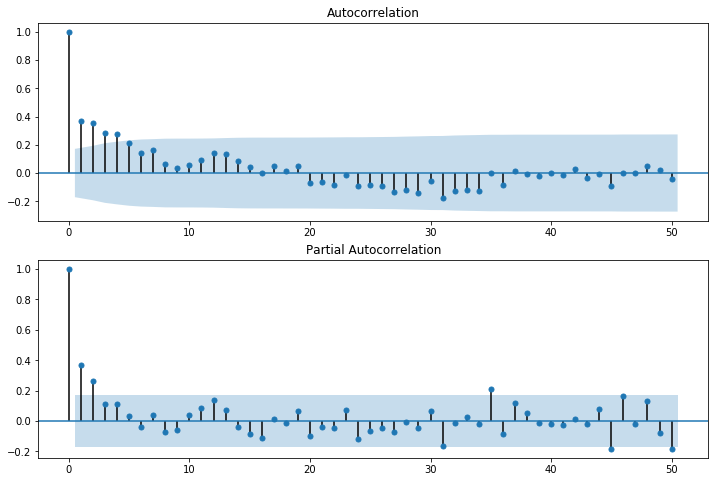

In [19]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
fig = sm.graphics.tsa.plot_acf(ytrain, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(ytrain, lags=50, ax=ax[1])
plt.show()

In [20]:
p = q = [0,1]
d = [1,2]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
df = pd.DataFrame()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ytrain,
                                            exog= Xtrain,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
        except:
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:3560.7075585233697


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:2776.451611112478
ARIMA(0, 1, 0)x(0, 2, 0, 12) - AIC:3280.488342929316


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC:2511.2352722409096


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:2828.9445229471858


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:2776.0485492853654


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 2, 0, 12) - AIC:2580.3382047849987


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 2, 1, 12) - AIC:2511.1850343127608


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:3073.0299023285443


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:2732.2531125464557


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 2, 0, 12) - AIC:2858.9439169625907


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 2, 1, 12) - AIC:2491.9826452953107


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:2804.034214936888


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:2733.5707235091895


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 2, 0, 12) - AIC:2575.0850827230447


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 2, 1, 12) - AIC:2493.2819398447136
ARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:3626.1564323460157


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:2842.4999312811233
ARIMA(0, 2, 0)x(0, 2, 0, 12) - AIC:3323.9550110268265


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 0)x(0, 2, 1, 12) - AIC:2561.368890587851


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 0)x(1, 1, 0, 12) - AIC:2891.8691447238866


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 0)x(1, 1, 1, 12) - AIC:2844.7264332008444


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 0)x(1, 2, 0, 12) - AIC:2633.490322490993


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 0)x(1, 2, 1, 12) - AIC:2563.861486764339


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 1)x(0, 1, 0, 12) - AIC:3111.9062920917795


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 1)x(0, 1, 1, 12) - AIC:2766.836556283671


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 1)x(0, 2, 0, 12) - AIC:2888.2682387495033


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 1)x(0, 2, 1, 12) - AIC:2515.9165465659535


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 1)x(1, 1, 0, 12) - AIC:2832.1390898395634


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 1)x(1, 1, 1, 12) - AIC:2768.1706412257017


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 1)x(1, 2, 0, 12) - AIC:2602.7284195130583


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 2, 1)x(1, 2, 1, 12) - AIC:2517.8940198024948


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:3102.960061378035


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:2761.9297826671736


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 2, 0, 12) - AIC:2887.4249788452034


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 2, 1, 12) - AIC:2521.8131793818934


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:2776.743969717081


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:2761.8481027477906


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 2, 0, 12) - AIC:2539.4806175419158


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 2, 1, 12) - AIC:2522.951433727313


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:3075.019254227035


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:2735.2783892947828


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 2, 0, 12) - AIC:2860.892115675677


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 2, 1, 12) - AIC:2494.4393653218353


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:2775.112943153785


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:2735.4224567154424


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 2, 0, 12) - AIC:2533.9091993005627


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 2, 1, 12) - AIC:2495.5993693872883


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 0)x(0, 1, 0, 12) - AIC:3171.5756662806207


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 0)x(0, 1, 1, 12) - AIC:2825.8763403814282


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 0)x(0, 2, 0, 12) - AIC:2934.353809888442


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 0)x(0, 2, 1, 12) - AIC:2563.9735223052553


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 0)x(1, 1, 0, 12) - AIC:2835.7590859009647


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 0)x(1, 1, 1, 12) - AIC:2828.613610053751


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 0)x(1, 2, 0, 12) - AIC:2585.368008953033


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 0)x(1, 2, 1, 12) - AIC:2565.896715463864
ARIMA(1, 2, 1)x(0, 1, 0, 12) - AIC:3112.305904843363


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 1)x(0, 1, 1, 12) - AIC:2766.5010556022357


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 1)x(0, 2, 0, 12) - AIC:2886.3763665411907


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 1)x(0, 2, 1, 12) - AIC:2515.0102670733822


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 1, 0, 12) - AIC:2803.7271170167246


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 1, 1, 12) - AIC:2768.1220603393876


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 2, 0, 12) - AIC:2562.169467454956


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 2, 1, 12) - AIC:2516.8275910265797


In [21]:
df.columns=['param','param_seasonal','AIC']
df.sort_values('AIC').reset_index(drop=True)

,param,param_seasonal,AIC
0,"(0, 1, 1)","(0, 2, 1, 12)",2491.982645
1,"(0, 1, 1)","(1, 2, 1, 12)",2493.281940
2,"(1, 1, 1)","(0, 2, 1, 12)",2494.439365
3,"(1, 1, 1)","(1, 2, 1, 12)",2495.599369
4,"(0, 1, 0)","(1, 2, 1, 12)",2511.185034
...,...,...,...
59,"(1, 2, 0)","(0, 1, 0, 12)",3171.575666
60,"(0, 1, 0)","(0, 2, 0, 12)",3280.488343
61,"(0, 2, 0)","(0, 2, 0, 12)",3323.955011
62,"(0, 1, 0)","(0, 1, 0, 12)",3560.707559


In [22]:
mod = sm.tsa.statespace.SARIMAX(ytrain,
                                exog= Xtrain,
                                order=(0,1,1),
                                seasonal_order = (0,2,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
results.summary()

D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Sum of Sales   No. Observations:                  131
Model:             SARIMAX(0, 1, 1)x(0, 2, 1, 12)   Log Likelihood               -1201.991
Date:                            Mon, 26 Apr 2021   AIC                           2491.983
Time:                                    14:55:50   BIC                           2602.941
Sample:                                01-01-2008   HQIC                          2536.767
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
============================================================================================================================================================================
                                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer                                  -44.8209     36.883     -1.215      0.224    -117.110      27.468
G325_indicators_m_trucking                                                                                1.519e+04    2.7e+04      0.562      0.574   -3.78e+04    6.82e+04
FTR Active Truck Utilization (%, SA)_freight_m_trucking                                                   9200.9295   2.11e+04      0.436      0.663   -3.22e+04    5.06e+04
Change in Payroll Employment (000's)_driver_indicators_m_trucking                                          -37.9869    321.993     -0.118      0.906    -669.082     593.108
Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer         -403.2926   1736.075     -0.232      0.816   -3805.938    2999.352
Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer              2671.2480   4120.890      0.648      0.517   -5405.549    1.07e+04
FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer                                                 532.5518   1.64e+04      0.033      0.974   -3.15e+04    3.26e+04
Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer             3897.7279   3112.699      1.252      0.210   -2203.050    9998.506
Change in Distillate Fuel Inventories_x                                                                     -2.0165      2.308     -0.874      0.382      -6.540       2.507
OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking                                                    -0.9682      3.973     -0.244      0.807      -8.755       6.819
FTR Rail Intermodal Loadings_Y/Y % Change_freight_m_trucking_trailer                                     -1017.6581   4428.990     -0.230      0.818   -9698.320    7663.004
Class 6-7 Bus, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer                       25.7383    129.959      0.198      0.843    -228.976     280.452
Change in Distillate Fuel Inventories_x.1                                                                   -2.0165      2.308     -0.874      0.382      -6.540       2.507
FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer                                                1.453e+04   2.16e+04      0.673      0.501   -2.78e+04    5.68e+04
Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer          -254.7567   2529.363     -0.101      0.920   -5212.217    4702.704
FTR Rail Carloading

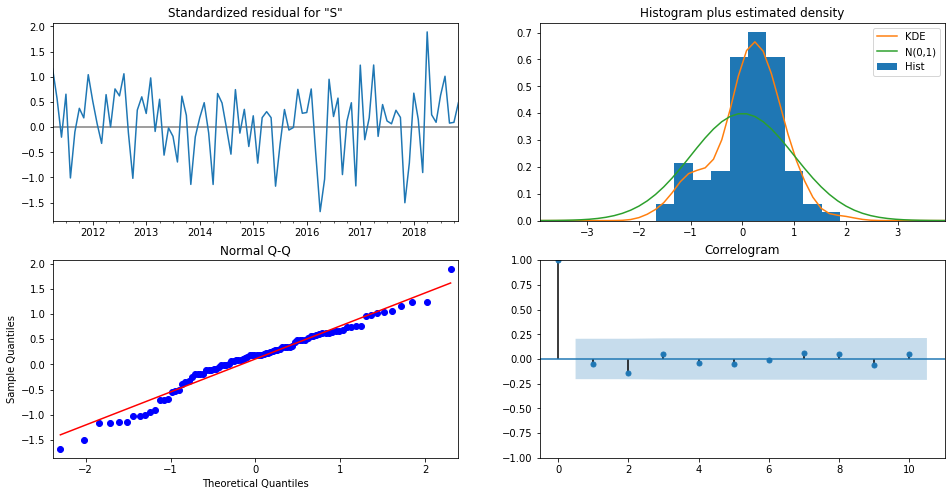

In [23]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

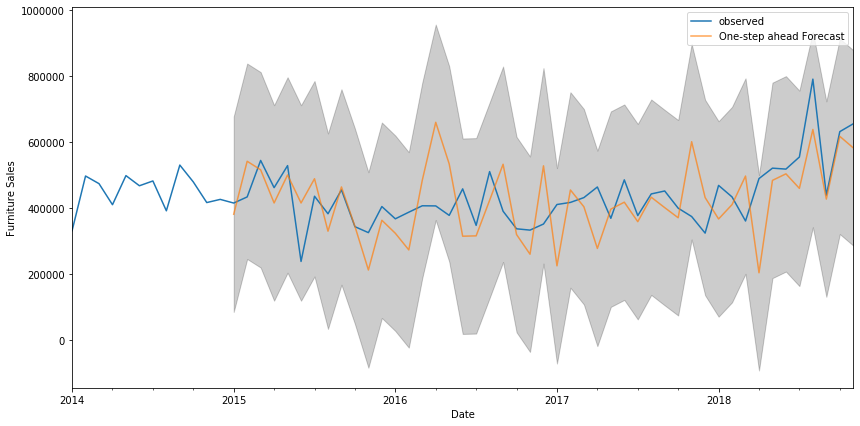

In [46]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ytrain['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

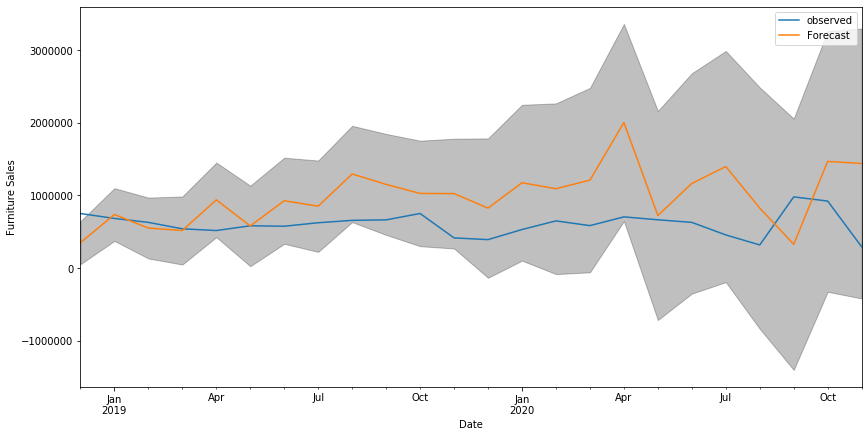

In [47]:
pred_uc = results.get_forecast(steps=24, exog= Xtest)
pred_ci = pred_uc.conf_int()
ax = ytest.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [48]:
# For training data
me.evaluate_model(pred.predicted_mean, ytrain['2015':])

			Model Performance

Mean Absolute Percentage Error: 0.20463505943936283

Mean Absolute Error: 83603.40634026082

BIAS: 11703.155078387204

Mean Squared Error: 6437300423.072671

Root Mean Squared Error: 80232.78895235209


In [49]:
# For testing data
me.evaluate_model(pred_uc.predicted_mean,ytest)

			Model Performance

Mean Absolute Percentage Error: 0.9083769697693477

Mean Absolute Error: 475533.06239284616

BIAS: -379072.40889920015

Mean Squared Error: 3448701388527.4175

Root Mean Squared Error: 1857067.954741403


## AutoArima with exogneous dataset

In [50]:
model = auto_arima(ytrain,
                   X=Xtrain,
                   start_p=0,
                   start_q=0,
                   max_p = 4,
                   max_q = 4,
                   start_P = 0,
                   start_Q = 0,
                   max_P = 4,
                   max_Q =4,
                   d = 1,
                   D = 1,
                   m=12,
                   seasonal= True,
                  trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3590.419, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3117.454, Time=5.84 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3099.663, Time=6.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3123.351, Time=2.39 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3101.025, Time=6.68 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3100.578, Time=15.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3112.144, Time=5.77 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3102.565, Time=15.68 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3122.086, Time=5.41 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3102.105, Time=6.79 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3100.276, Time=5.81 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3103.994, Time=5.70 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=3102.963, Time=6.86 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=3109.805, Time=7.12 sec

Best model:  ARI

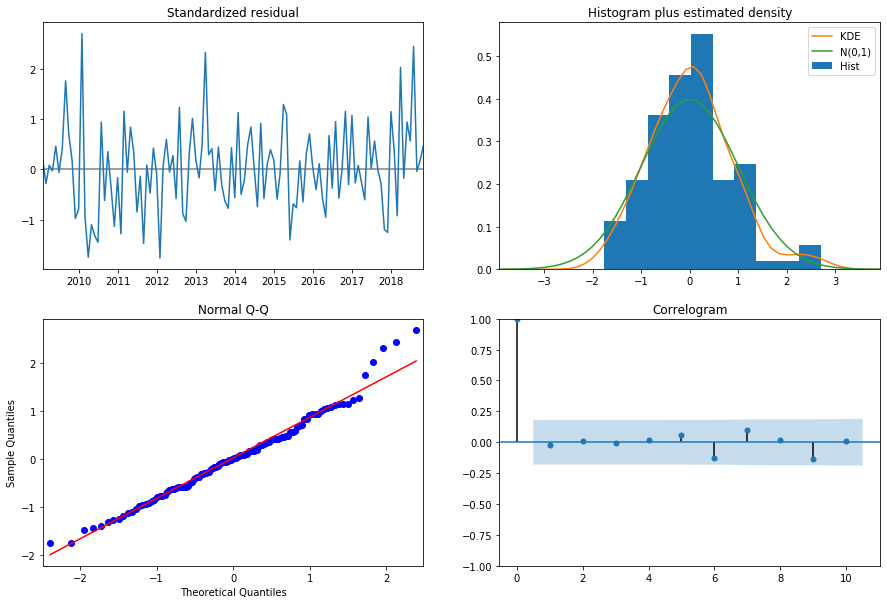

In [52]:
model.plot_diagnostics(figsize=(15,10))
plt.show()

In [53]:
results= pd.DataFrame(model.predict(24, Xtest), index=Xtest.index)
results

,0
2018-12-01,5.271606e+05
2019-01-01,6.156495e+05
2019-02-01,5.132355e+05
2019-03-01,5.803364e+05
2019-04-01,7.401759e+05
2019-05-01,6.103609e+05
2019-06-01,6.941257e+05
2019-07-01,5.951631e+05
2019-08-01,7.639150e+05
2019-09-01,7.286227e+05


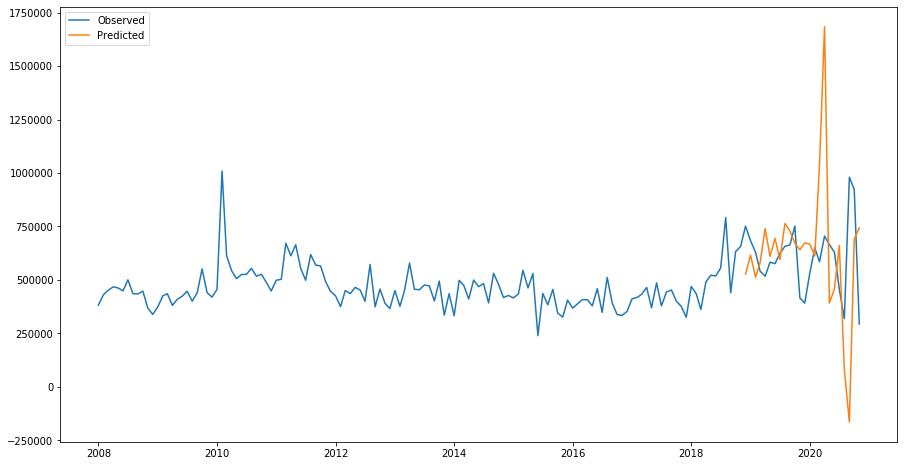

In [54]:
plt.figure(figsize=[15,8])
plt.plot(packaging['Sum of Sales'],label= 'Observed')
plt.plot(results, label='Predicted')
plt.legend()
plt.show()

# Model Evaluation
 - Mean Absolute Percentage Error
 - Mean Absolute Error
 - BIAS
 - Mean Squared Error
 - Root Mean Squared Error

#### Train Set

In [55]:
me.evaluate_model(ytrain,model.predict(131,Xtrain))

			Model Performance

Mean Absolute Percentage Error: 0.517921983741242

Mean Absolute Error: 583519.1683617836

BIAS: 581321.8085837804

Mean Squared Error: 44269490912700.39

Root Mean Squared Error: 6653532.213245863


#### Test Set

In [56]:
me.evaluate_model(ytest,model.predict(24, Xtest))

			Model Performance

Mean Absolute Percentage Error: 0.6694783814261935

Mean Absolute Error: 247084.28839400315

BIAS: 29051.365374182293

Mean Squared Error: 20255563922.50171

Root Mean Squared Error: 142322.04299581182
